In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fin_dt = drive.CreateFile({'id':'1DJz0dEcz85wP_g1frkri1NK0ewEjnY1z'}) # replace the id with id of file you want to access
fin_dt.GetContentFile('final_tran_dt.pkl') 

In [ ]:
fin_df=joblib.load("final_tran_dt.pkl")

In [ ]:
fin_df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,26110,56,1933,19,44,2,-1,0,1,0,0,0,1,9,3,0,1,0,0,0,0,0,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,1,0,1,0,0,5,3,0,0,0,0,0,0,0,0,1,0,0,0
3,43962,57,3287,22,867,1,84,3,0,0,0,0,0,6,2,1,0,0,0,0,1,0,0,0,0,0,0
4,29842,31,119,4,380,1,-1,0,1,0,1,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from random import randint
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
x=fin_df.drop('subscribed_le',axis=1)
y=fin_df['subscribed_le']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=100) # 0.25 x 0.8 = 0.2

In [ ]:
dtrees=DecisionTreeClassifier(criterion= 'gini',max_depth= 3, min_samples_leaf=4,splitter='best')

In [ ]:
dtrees.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtrees_pred=dtrees.predict(x_val)

In [ ]:
print(classification_report(y_val,dtrees_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5584
           1       0.58      0.58      0.58       746

    accuracy                           0.90      6330
   macro avg       0.76      0.76      0.76      6330
weighted avg       0.90      0.90      0.90      6330



In [ ]:
print(confusion_matrix(y_val,dtrees_pred))

[[5272  312]
 [ 317  429]]


In [ ]:
rf=RandomForestClassifier(bootstrap=True, max_depth=20, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=123)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred=rf.predict(x_val)

In [ ]:
print(confusion_matrix(y_val,rf_pred))

[[5418  166]
 [ 382  364]]


In [ ]:
print(classification_report(y_val,rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5584
           1       0.69      0.49      0.57       746

    accuracy                           0.91      6330
   macro avg       0.81      0.73      0.76      6330
weighted avg       0.90      0.91      0.91      6330



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train_tf = scaler.transform(x_train)  
x_test_tf = scaler.transform(x_test) 
x_val_tf = scaler.transform(x_val) 

In [ ]:
svc=SVC(C=100, gamma= 0.01, kernel= 'rbf')

In [ ]:
svc.fit(x_train_tf,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred=svc.predict(x_val_tf)

In [ ]:
print(classification_report(y_val,svc_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5584
           1       0.65      0.38      0.48       746

    accuracy                           0.90      6330
   macro avg       0.79      0.67      0.71      6330
weighted avg       0.89      0.90      0.89      6330



In [ ]:
print(confusion_matrix(y_val,svc_pred))

[[5434  150]
 [ 466  280]]


In [ ]:
#Combining x_train and x_val to generate a large training set with orginal labels to test the model's performance on x_test

In [ ]:
x_combined_org=x_train.append(x_val)

In [ ]:
y_combined_org=y_train.append(y_val)

In [ ]:
rf_org=RandomForestClassifier(bootstrap=True, max_depth=20, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=123)

In [ ]:
rf_org.fit(x_combined_org,y_combined_org)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
rf_org_pred=rf_org.predict(x_test)

In [ ]:
print(classification_report(y_test,rf_org_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5551
           1       0.66      0.48      0.56       779

    accuracy                           0.91      6330
   macro avg       0.80      0.72      0.75      6330
weighted avg       0.90      0.91      0.90      6330



In [ ]:
print(confusion_matrix(y_test,rf_org_pred))

[[5358  193]
 [ 402  377]]


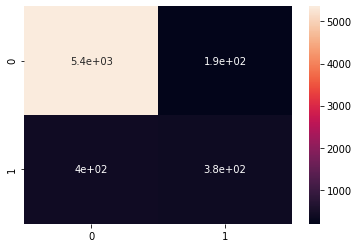

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,rf_org_pred), annot=True)

In [ ]:
#Now Generating a dataframe with samples(x_val), dtrees_pred, rf_pred, svc_pred, final_pred columns

In [ ]:
df_preds_validation_dt=x_val.copy()

In [ ]:
df_preds_validation_dt

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
5473,26383,31,900,20,321,2,190,4,2,0,1,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0
27398,26494,42,2145,20,124,3,-1,0,1,0,0,0,0,9,3,0,0,0,0,0,0,0,1,0,0,0
22985,28461,28,1823,29,237,1,-1,0,2,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0
7213,27125,31,796,21,150,1,-1,0,2,0,0,1,0,9,3,0,0,0,0,1,0,0,0,0,0,0
28472,39704,36,217,27,103,1,-1,0,1,0,0,0,0,8,3,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25268,41083,33,1974,14,498,2,191,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
640,14137,58,0,11,965,2,-1,0,0,0,0,0,0,5,3,0,0,0,1,0,0,0,0,0,0,0
9190,36094,29,228,11,12,8,342,9,1,0,1,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0
30585,32528,37,616,17,18,1,-1,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
type(dtrees_pred)

numpy.ndarray

In [ ]:
type(rf_pred)

numpy.ndarray

In [ ]:
type(svc_pred)

numpy.ndarray

In [ ]:
dtrees_pred_series=pd.Series(dtrees_pred)

In [ ]:
rf_pred_series=pd.Series(rf_pred)

In [ ]:
svc_pred_series=pd.Series(svc_pred)

In [ ]:
df_preds_validation_dt['svc_predictions']=svc_pred

In [ ]:
df_preds_validation_dt['dtrees_predictions']=dtrees_pred

In [ ]:
df_preds_validation_dt['rf_predictions']=rf_pred

In [ ]:
df_preds_validation_dt.head()

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,svc_predictions,dtrees_predictions,rf_predictions
5473,26383,31,900,20,321,2,190,4,2,0,1,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27398,26494,42,2145,20,124,3,-1,0,1,0,0,0,0,9,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22985,28461,28,1823,29,237,1,-1,0,2,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7213,27125,31,796,21,150,1,-1,0,2,0,0,1,0,9,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
28472,39704,36,217,27,103,1,-1,0,1,0,0,0,0,8,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_preds_validation_dt['final_pred_labels']=rf_pred

In [ ]:
df_preds_validation_dt['final_pred_labels'] = np.where((df_preds_validation_dt['svc_predictions'] == df_preds_validation_dt['dtrees_predictions']) & (df_preds_validation_dt['dtrees_predictions'] == df_preds_validation_dt['svc_predictions'])
                     , df_preds_validation_dt['svc_predictions'], df_preds_validation_dt['final_pred_labels'])

df_preds_validation_dt['final_pred_labels'] = np.where((df_preds_validation_dt['dtrees_predictions'] == df_preds_validation_dt['rf_predictions']) & (df_preds_validation_dt['rf_predictions'] == df_preds_validation_dt['dtrees_predictions'])
                     , df_preds_validation_dt['dtrees_predictions'], df_preds_validation_dt['final_pred_labels'])

df_preds_validation_dt['final_pred_labels'] = np.where((df_preds_validation_dt['svc_predictions'] == df_preds_validation_dt['rf_predictions']) & (df_preds_validation_dt['rf_predictions'] == df_preds_validation_dt['svc_predictions'])
                     , df_preds_validation_dt['svc_predictions'], df_preds_validation_dt['final_pred_labels'])

df_preds_validation_dt['final_pred_labels'] = np.where((df_preds_validation_dt['svc_predictions'] == df_preds_validation_dt['dtrees_predictions']) & (df_preds_validation_dt['dtrees_predictions'] == df_preds_validation_dt['rf_predictions'])
                     , df_preds_validation_dt['svc_predictions'], df_preds_validation_dt['final_pred_labels'])


In [ ]:
df_preds_validation_dt.head()

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,svc_predictions,dtrees_predictions,rf_predictions,final_pred_labels
5473,26383,31,900,20,321,2,190,4,2,0,1,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27398,26494,42,2145,20,124,3,-1,0,1,0,0,0,0,9,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
22985,28461,28,1823,29,237,1,-1,0,2,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7213,27125,31,796,21,150,1,-1,0,2,0,0,1,0,9,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
28472,39704,36,217,27,103,1,-1,0,1,0,0,0,0,8,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_preds_validation_dt.isna().sum()

ID                    0
age                   0
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
marital_le            0
default_le            0
housing_le            0
loan_le               0
contact_le            0
month_le              0
poutcome_le           0
job_admin.            0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
svc_predictions       0
dtrees_predictions    0
rf_predictions        0
final_pred_labels     0
dtype: int64

In [ ]:
x_val_preds=df_preds_validation_dt.copy()

In [ ]:
x_val_preds.drop(['svc_predictions', 'dtrees_predictions', 'rf_predictions'], axis=1, inplace=True)

In [ ]:
x_val_preds

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,final_pred_labels
5473,26383,31,900,20,321,2,190,4,2,0,1,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,0
27398,26494,42,2145,20,124,3,-1,0,1,0,0,0,0,9,3,0,0,0,0,0,0,0,1,0,0,0,0
22985,28461,28,1823,29,237,1,-1,0,2,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0,0
7213,27125,31,796,21,150,1,-1,0,2,0,0,1,0,9,3,0,0,0,0,1,0,0,0,0,0,0,0
28472,39704,36,217,27,103,1,-1,0,1,0,0,0,0,8,3,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25268,41083,33,1974,14,498,2,191,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
640,14137,58,0,11,965,2,-1,0,0,0,0,0,0,5,3,0,0,0,1,0,0,0,0,0,0,0,0
9190,36094,29,228,11,12,8,342,9,1,0,1,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0
30585,32528,37,616,17,18,1,-1,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
x_val_after_pred=x_val_preds.drop('final_pred_labels',axis=1)

In [ ]:
y_val_after_preds=x_val_preds['final_pred_labels']

In [ ]:
x_val_after_pred

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
5473,26383,31,900,20,321,2,190,4,2,0,1,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0
27398,26494,42,2145,20,124,3,-1,0,1,0,0,0,0,9,3,0,0,0,0,0,0,0,1,0,0,0
22985,28461,28,1823,29,237,1,-1,0,2,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0
7213,27125,31,796,21,150,1,-1,0,2,0,0,1,0,9,3,0,0,0,0,1,0,0,0,0,0,0
28472,39704,36,217,27,103,1,-1,0,1,0,0,0,0,8,3,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25268,41083,33,1974,14,498,2,191,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
640,14137,58,0,11,965,2,-1,0,0,0,0,0,0,5,3,0,0,0,1,0,0,0,0,0,0,0
9190,36094,29,228,11,12,8,342,9,1,0,1,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0
30585,32528,37,616,17,18,1,-1,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_val_after_preds

5473     0
27398    0
22985    0
7213     0
28472    0
        ..
25268    1
640      0
9190     0
30585    0
24937    0
Name: final_pred_labels, Length: 6330, dtype: int64

In [ ]:
df_preds_validation_dt

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,svc_predictions,dtrees_predictions,rf_predictions,final_pred_labels
5473,26383,31,900,20,321,2,190,4,2,0,1,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27398,26494,42,2145,20,124,3,-1,0,1,0,0,0,0,9,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
22985,28461,28,1823,29,237,1,-1,0,2,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7213,27125,31,796,21,150,1,-1,0,2,0,0,1,0,9,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
28472,39704,36,217,27,103,1,-1,0,1,0,0,0,0,8,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25268,41083,33,1974,14,498,2,191,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
640,14137,58,0,11,965,2,-1,0,0,0,0,0,0,5,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9190,36094,29,228,11,12,8,342,9,1,0,1,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30585,32528,37,616,17,18,1,-1,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Now combining x_train, x_val_after_pred and y_train, y_val_after_pred

In [ ]:
x_combined_new=x_train.append(x_val_after_pred)
y_combined_new=y_train.append(y_val_after_preds)

In [ ]:
x_combined_new

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
29715,15307,46,0,18,115,1,-1,0,1,0,0,1,0,5,3,0,0,1,0,0,0,0,0,0,0,0
705,9335,41,-140,6,190,1,-1,0,1,0,0,1,2,6,3,0,0,0,0,0,0,0,1,0,0,0
26622,12456,54,9,1,140,1,-1,0,1,0,0,1,2,5,3,1,0,0,0,0,0,0,0,0,0,0
29153,19002,59,2552,5,125,3,-1,0,1,0,0,1,0,1,3,1,0,0,0,0,0,0,0,0,0,0
22185,40795,64,504,11,157,1,14,3,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25268,41083,33,1974,14,498,2,191,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
640,14137,58,0,11,965,2,-1,0,0,0,0,0,0,5,3,0,0,0,1,0,0,0,0,0,0,0
9190,36094,29,228,11,12,8,342,9,1,0,1,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0
30585,32528,37,616,17,18,1,-1,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_combined_new

29715    0
705      0
26622    0
29153    0
22185    0
        ..
25268    1
640      0
9190     0
30585    0
24937    0
Length: 25317, dtype: int64

In [ ]:
rf_new=RandomForestClassifier(bootstrap=True, max_depth=20, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=123)

In [ ]:
rf_new.fit(x_combined_new,y_combined_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
rf_new_pred=rf_new.predict(x_test)

In [ ]:
print(classification_report(y_test,rf_new_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5551
           1       0.66      0.45      0.54       779

    accuracy                           0.90      6330
   macro avg       0.79      0.71      0.74      6330
weighted avg       0.89      0.90      0.90      6330



In [ ]:
print(classification_report(y_test,rf_org_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5551
           1       0.66      0.48      0.56       779

    accuracy                           0.91      6330
   macro avg       0.80      0.72      0.75      6330
weighted avg       0.90      0.91      0.90      6330



In [ ]:
print(confusion_matrix(y_test,rf_new_pred))

[[5371  180]
 [ 427  352]]


In [ ]:
print(confusion_matrix(y_test,rf_org_pred))

[[5358  193]
 [ 402  377]]


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

ascore_org=accuracy_score(y_test,rf_org_pred)
ascore_new=accuracy_score(y_test,rf_new_pred)

recall_org=recall_score(y_test,rf_org_pred)
recall_new=recall_score(y_test,rf_new_pred)

f1_org=f1_score(y_test,rf_org_pred)
f1_new=f1_score(y_test,rf_new_pred)

precision_org=precision_score(y_test,rf_org_pred)
precision_new=precision_score(y_test,rf_new_pred)

In [ ]:
results_df=pd.DataFrame()

In [ ]:
results_df['Metric']=['precision','recall','f1 score','overall accuracy']
results_df['Base_line_model_value']=[precision_org,recall_org,f1_org,ascore_org]
results_df['Primary_model_value']=[precision_new,recall_new,f1_new,ascore_new]

In [ ]:
results_df

,Metric,Base_line_model_value,Primary_model_value
0,precision,0.661404,0.661654
1,recall,0.483954,0.451861
2,f1 score,0.558933,0.536995
3,overall accuracy,0.906003,0.904107


Text(0, 0.5, 'Value')

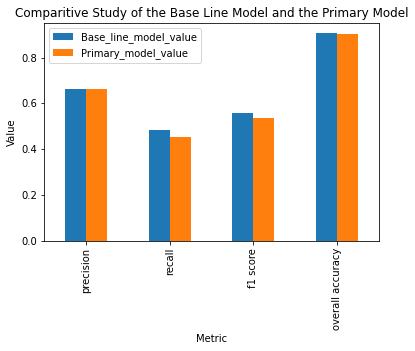

In [ ]:
plotdata = pd.DataFrame({
    'Base_line_model_value':[precision_org,recall_org,f1_org,ascore_org],
    'Primary_model_value':[precision_new,recall_new,f1_new,ascore_new],
    }, 
    index=['precision','recall','f1 score','overall accuracy']
)
plotdata.plot(kind="bar")
plt.title("Comparitive Study of the Base Line Model and the Primary Model")
plt.xlabel("Metric")
plt.ylabel("Value")

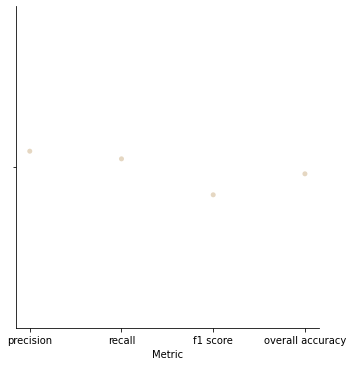

In [ ]:
#sns.catplot(x=results_df['Metric'], y=results_df["Value"], hue="class", kind="bar", data=titanic)
sns.catplot(x=results_df['Metric'], palette="ch:.25", data=results_df)